# Supervised Learning mini-project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.shape

(150, 6)

In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
df=df.drop(["Id"],axis=1)

In [11]:
df.duplicated().any()

True

In [12]:
 df=df.drop_duplicates()

In [13]:
df.duplicated().any()

False

In [14]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


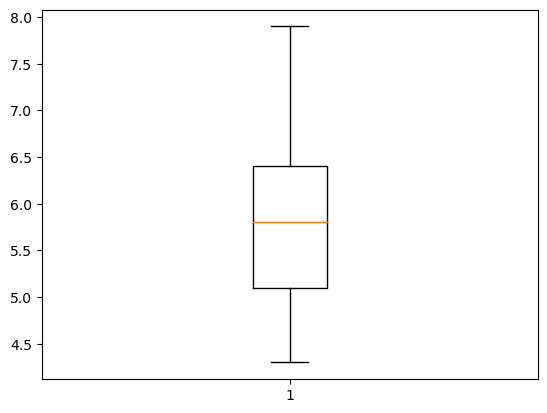

In [16]:
# check outlier in numeric columns
plt.boxplot(df['SepalLengthCm'])
plt.show()

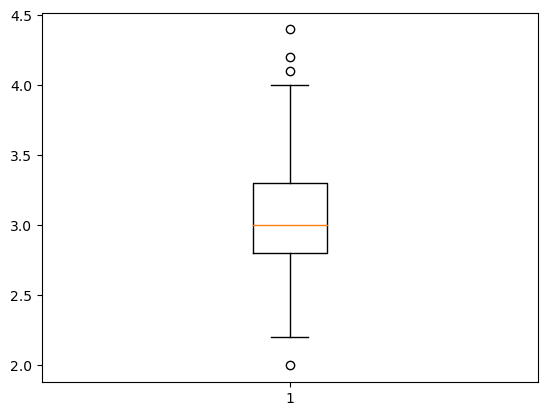

In [17]:
plt.boxplot(df['SepalWidthCm'])
plt.show()

In [18]:
def remove_outliers(d,c):
    # where d is the variable for dataframe and c is the variable for column
    
    #find q1 and q3
    q1=d[c].quantile(0.25)
    q3=d[c].quantile(0.75)
    
    #calculate igr(inter quaetile range)
    iqr=q3-q1
    
    # find upper bound (ub) and lower bound(lb)
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    
    # filter good data (i e eliminate outliers)
    data_without_outlier=d[(d[c]<=ub)&(d[c]>=lb)]
    
    return data_without_outlier
   

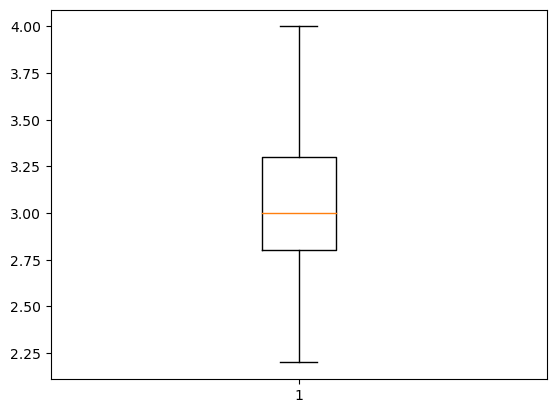

In [19]:
# remove outliers from SepalWidthCm variable
df=remove_outliers(df,'SepalWidthCm')

plt.boxplot(df['SepalWidthCm'])
plt.show()

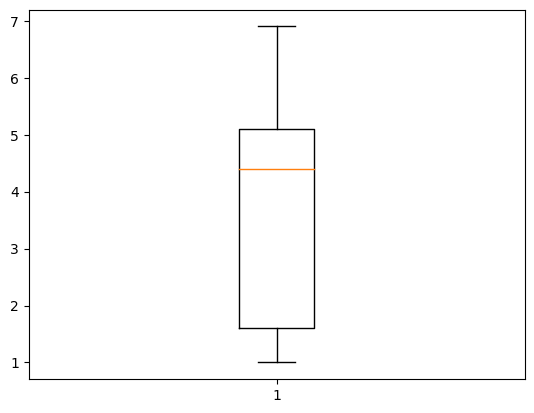

In [20]:
plt.boxplot(df['PetalLengthCm'])
plt.show()

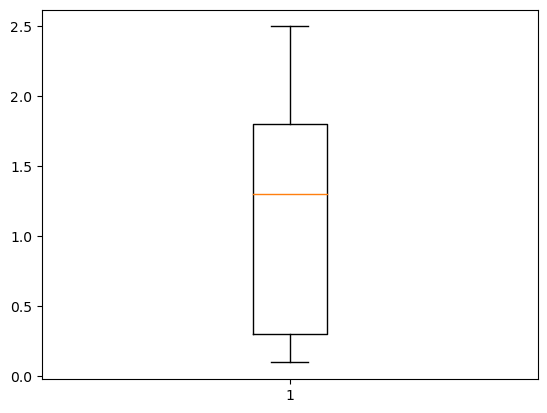

In [21]:
plt.boxplot(df['PetalWidthCm'])
plt.show()

# checking EDA

C:\Users\ACER\AppData\Local\Temp\ipykernel_17964\789205228.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SepalLengthCm'])


<Axes: xlabel='SepalLengthCm', ylabel='Density'>

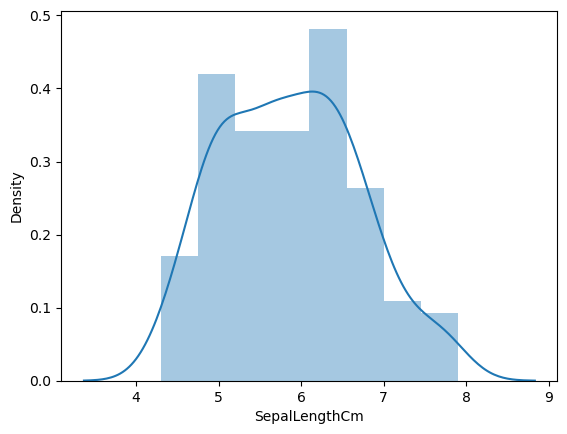

In [22]:
sns.distplot(df['SepalLengthCm'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_17964\3402425195.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SepalWidthCm'])


<Axes: xlabel='SepalWidthCm', ylabel='Density'>

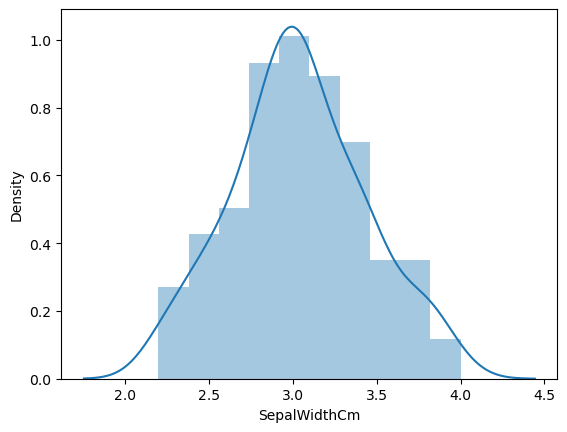

In [23]:
sns.distplot(df['SepalWidthCm'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_17964\2781944064.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PetalLengthCm'])


<Axes: xlabel='PetalLengthCm', ylabel='Density'>

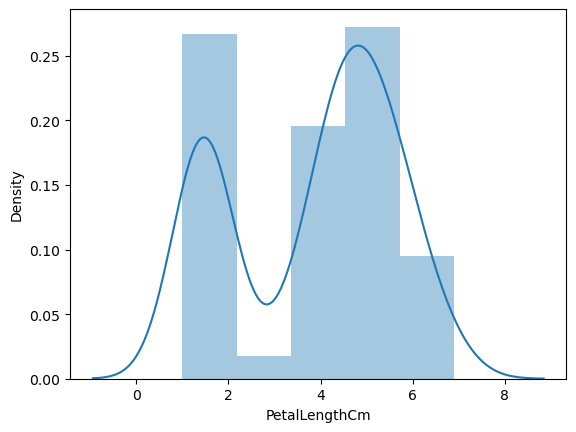

In [24]:
sns.distplot(df['PetalLengthCm'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_17964\3666008087.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PetalWidthCm'])


<Axes: xlabel='PetalWidthCm', ylabel='Density'>

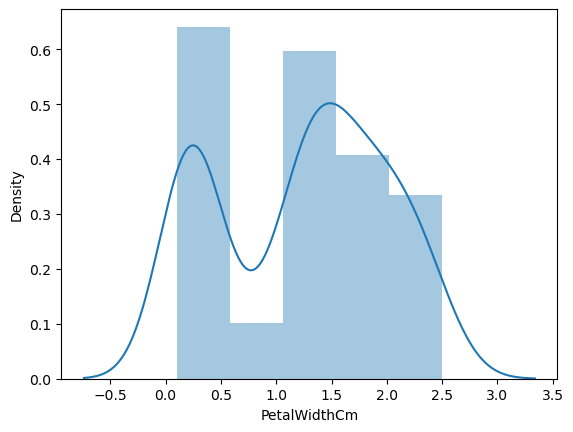

In [25]:
sns.distplot(df['PetalWidthCm'])

<Axes: xlabel='SepalLengthCm'>

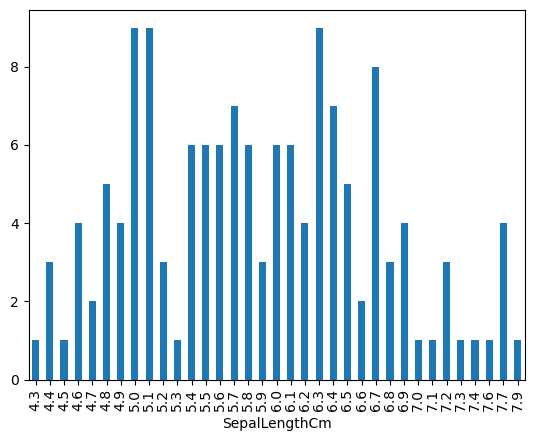

In [26]:
df.groupby('SepalLengthCm')['SepalLengthCm'].count().plot(kind='bar')

<Axes: xlabel='SepalWidthCm'>

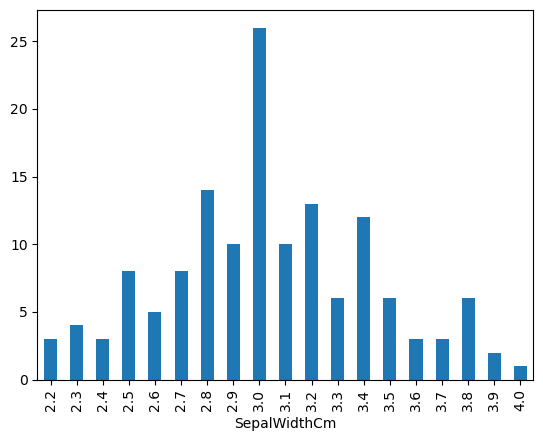

In [27]:
df.groupby('SepalWidthCm')['SepalWidthCm'].count().plot(kind='bar')

<Axes: xlabel='PetalLengthCm'>

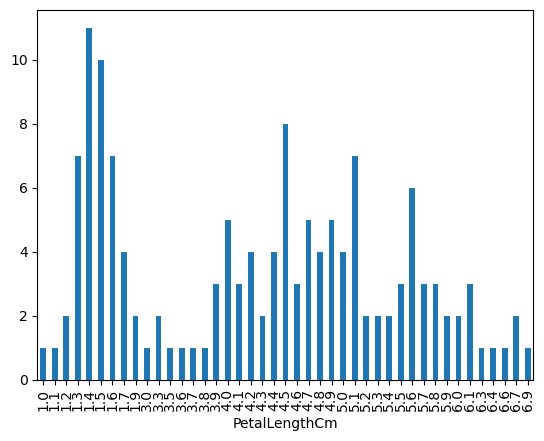

In [28]:
df.groupby('PetalLengthCm')['PetalLengthCm'].count().plot(kind='bar')

<Axes: xlabel='PetalWidthCm'>

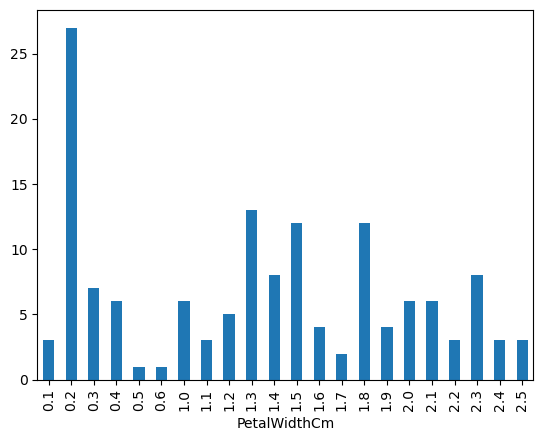

In [29]:
df.groupby('PetalWidthCm')['PetalWidthCm'].count().plot(kind='bar')

<Axes: xlabel='Species'>

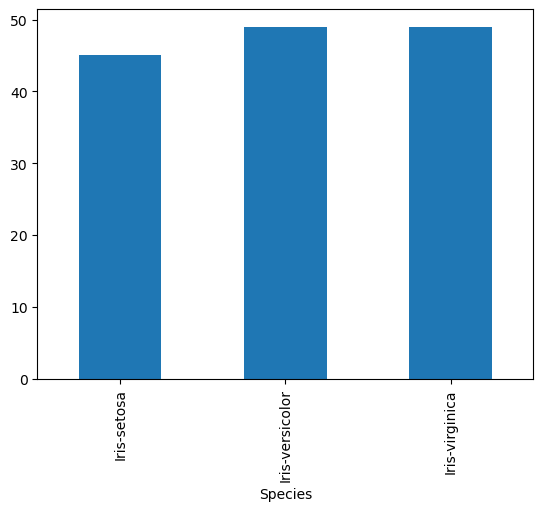

In [30]:
df.groupby('Species')['Species'].count().plot(kind='bar')

<Axes: >

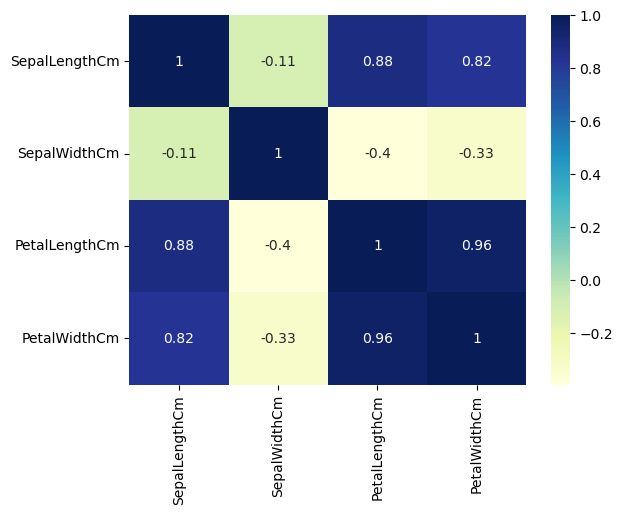

In [31]:
df_numeric=df.drop(['Species'],axis=1)
sns.heatmap(df_numeric.corr(),cmap='YlGnBu',annot=True)

# End of EDA

In [32]:
x=df.drop('Species',axis=1)
y=df['Species']

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [34]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# 1) Random Forest

In [35]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score
from sklearn.metrics import classification_report

In [36]:
model=RandomForestClassifier(n_estimators=10,random_state=0)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [37]:
y_pred=model.predict(x_test)
print(y_pred)

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor']


In [38]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{'{:.2f}%'.format(accuracy*100)}")

Accuracy:97.67%


In [39]:
class_report=classification_report(y_test,y_pred)
print(f"Classification Report:\n{class_report}")

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.98        43
      macro avg       0.98      0.97      0.97        43
   weighted avg       0.98      0.98      0.98        43



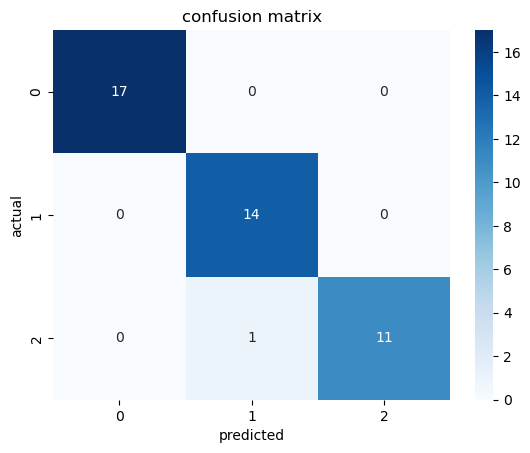

In [40]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='g') 
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()

# 2) KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [43]:
knn.score(x_test,y_test)

0.9534883720930233

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
pred = knn.predict(x_test)
print(classification_report(y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.93      0.93      0.93        14
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.95        43
      macro avg       0.95      0.95      0.95        43
   weighted avg       0.95      0.95      0.95        43



In [45]:
matrix = confusion_matrix(y_test,pred)
print(matrix)

[[17  0  0]
 [ 0 13  1]
 [ 0  1 11]]


<Axes: >

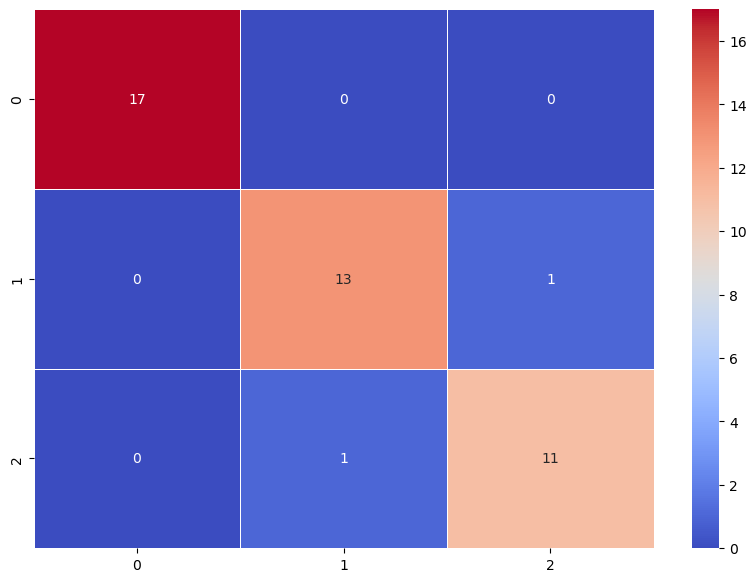

In [46]:
plt.figure(figsize=(10,7))
sns.heatmap(matrix,annot=True,cmap="coolwarm",linewidths=.5,fmt='g')

# 3) Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 

In [48]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [49]:
y_pred=model.predict(x_test)
print(y_pred)

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica']


In [50]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{'{:.2f}%'.format(accuracy*100)}")

Accuracy:100.00%


In [51]:
cm=confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

confusion matrix:
 [[17  0  0]
 [ 0 14  0]
 [ 0  0 12]]


In [52]:
class_report=classification_report(y_test,y_pred)
print(f"Classification Report:\n{class_report}")

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        43
      macro avg       1.00      1.00      1.00        43
   weighted avg       1.00      1.00      1.00        43



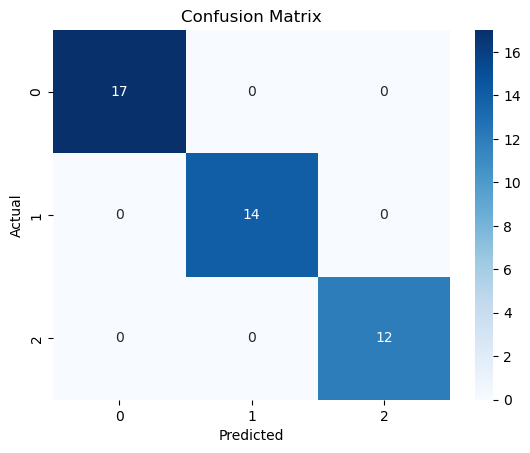

In [53]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='g') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 4) SVM

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [55]:
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [56]:
print('Model accuracy :{0:0.3f}'.format(accuracy_score(y_test,y_pred)))

Model accuracy :1.000


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        43
      macro avg       1.00      1.00      1.00        43
   weighted avg       1.00      1.00      1.00        43



# 5) Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [59]:
y_pred=classifier.predict(x_test)
print(y_pred)

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica']


In [60]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [61]:
print(classifier.score(x_train,y_train))
y_train_pred=classifier.predict(x_train)

0.96


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        28
Iris-versicolor       0.97      0.91      0.94        35
 Iris-virginica       0.92      0.97      0.95        37

       accuracy                           0.96       100
      macro avg       0.96      0.96      0.96       100
   weighted avg       0.96      0.96      0.96       100



# 6) Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [64]:
# creating decision tree using entropy:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)

clf.fit(x_train,y_train)
# entropy is the uncertinity in a dataset. ti aims to minimize the entropy of the target variable in the subsets created by the split.

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.375, 0.875, 'x[3] <= -0.649\nentropy = 1.575\nsamples = 100\nvalue = [28.0, 35.0, 37.0]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 28\nvalue = [28, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 0.537\nentropy = 0.999\nsamples = 72\nvalue = [0, 35, 37]'),
 Text(0.25, 0.375, 'x[3] <= 0.503\nentropy = 0.323\nsamples = 34\nvalue = [0, 32, 2]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.375, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.75, 0.375, 'x[3] <= 0.638\nentropy = 0.398\nsamples = 38\nvalue = [0, 3, 35]'),
 Text(0.625, 0.125, 'entropy = 0.985\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 31\nvalue = [0, 0, 31]')]

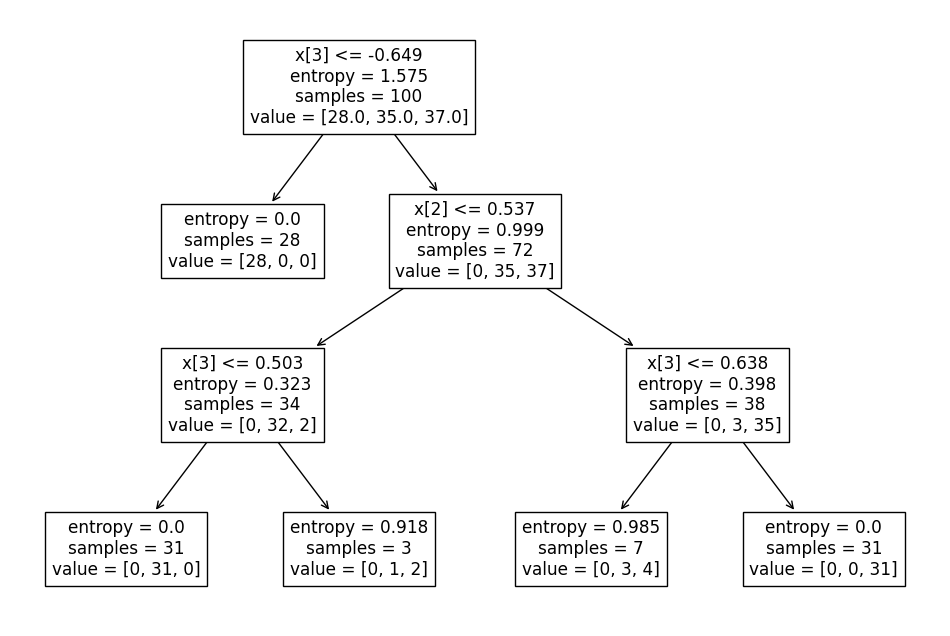

In [65]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf.fit(x_train,y_train))

In [66]:
# Predict values
y_pred=clf.predict(x_test)

In [67]:
# predict values using x_train
y_pred_train=clf.predict(x_train)

In [68]:
# Calculating accuracy_score from scikit_learn
print('criterion entropy accuracy:{0:.2f}'.format(accuracy_score(y_test,y_pred)*100))
print('Training set:{0:.2f}'.format(accuracy_score(y_train,y_pred_train)*100))

criterion entropy accuracy:97.67
Training set:96.00


In [69]:
# calculating accuracy_score from model of the classifier
print('Training set score:{0:.2f}'.format(clf.score(x_train,y_train)*100))
print('Test set score:{0:.2f}'.format(clf.score(x_test,y_test)*100))

Training set score:96.00
Test set score:97.67


In [70]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[17  0  0]
 [ 0 13  1]
 [ 0  0 12]]


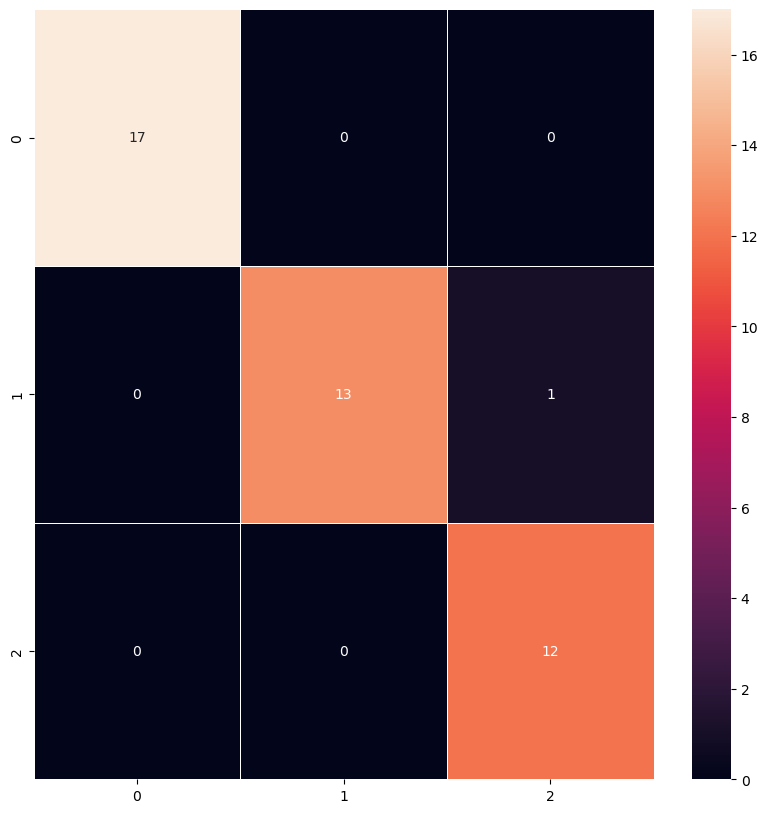

In [71]:
plt.subplots(figsize=(10,10))
sns.heatmap(cm,annot=True,linewidths=0.5,fmt='.0f')
plt.show()

In [72]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        43
      macro avg       0.97      0.98      0.97        43
   weighted avg       0.98      0.98      0.98        43



In [74]:
f1_score=f1_score(y_test,y_pred,average ="weighted")
print(f1_score)

0.9767786391042204


# Conclusion

#### for the given dataset ,the accuracy_score for:
#### 1) Random Forest is 97.67% , 
#### 2) KNN_score is 95.34% ,
#### 3) Naive Bayes is 100%,
#### 4) SVM is 100%,
#### 5) Logistic Regression is 96%,
#### 6) Decision Tree is 97.67%
#### so we can conclude that Logistic Regression method gives more accuracy for this given dataset .